# <b>Description
## Background and Context</b>

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

<b>Customer details:</b>
<li>
CustomerID: Unique customer ID</li>
<li>ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)</li>
<li>Age: Age of customer</li>
<li>Type of Contact: How customer was contacted (Company Invited or Self Inquiry)</li>
<li>City Tier: City tier depends on the development of a city, population, facilities, and living standards.</li><li> The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3</li>
<li>Occupation: Occupation of customer</li>
<li>Gender: Gender of customer</li>
<li>Number Of PersonVisiting: Total number of persons planning to take the trip with the customer</li>
<li>Preferred PropertyStar: Preferred hotel property rating by customer</li>
<li>MaritalStatus: Marital status of customer</li>
<li>Number Of Trips: Average number of trips in a year by customer</li>
<li>Passport: The customer has a passport or not (0: No, 1: Yes)</li>
<li>OwnCar: Whether the customers own a car or not (0: No, 1: Yes)</li>
<li>Number Of ChildrenVisiting: Total No.0f children with age less than 5 planning to take the trip with the customer</li>
<li>Designation: Designation of the customer in the current organization</li>
<li>Monthly Income: Gross monthly income of the customer
</li>

## Customer interaction data: 
<ol>
    <li>PitchSatisfactionScore: Sales pitch satisfaction score</li>
    <li>ProductPitched: Product pitched by the salesperson</li>
 <li>Number Of Followups: Total number of follow-ups has been done by the salesperson after the sales pitch</li>
    <li>Duration OfPitch: Duration of the pitch by a salesperson to the customer</li>
 </ol>

# Data loading and reading them 

## Import necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV


## Read the data

In [2]:
data=pd.read_csv("Tourism1.csv")

## First and Last 5 rows

In [3]:
data.head(5)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [4]:
data.tail(5)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0

## Shape of the Data

In [5]:
data.shape

(4888, 20)

There are 4888 rows and 20 columns

## Finding the types of Data available

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Obesrvation: We do have some missing values and Few data types need to be in categorical 

## Summary of the Data set

In [7]:
data.describe().T

count           mean          std       min  \
CustomerID                4888.0  202443.500000  1411.188388  200000.0   
ProdTaken                 4888.0       0.188216     0.390925       0.0   
Age                       4662.0      37.622265     9.316387      18.0   
CityTier                  4888.0       1.654255     0.916583       1.0   
DurationOfPitch           4637.0      15.490835     8.519643       5.0   
NumberOfPersonVisiting    4888.0       2.905074     0.724891       1.0   
NumberOfFollowups         4843.0       3.708445     1.002509       1.0   
PreferredPropertyStar     4862.0       3.581037     0.798009       3.0   
NumberOfTrips             4748.0       3.236521     1.849019       1.0   
Passport                  4888.0       0.290917     0.454232       0.0   
PitchSatisfactionScore    4888.0       3.078151     1.365792       1.0   
OwnCar                    4888.0       0.620295     0.485363       0.0   
NumberOfChildrenVisiting  4822.0       1.187267     0.857861       0.0   
MonthlyIncome             4655.0   23619.853491  5380.698361    1000.0   

                                25%       50%        75%       max  
CustomerID                201221.75  202443.5  203665.25  204887.0  
ProdTaken                      0.00       0.0       0.00       1.0  
Age                           31.00      36.0      44.00      61.0  
CityTier                       1.00       1.0       3.00       3.0  
DurationOfPitch                9.00      13.0      20.00     127.0  
NumberOfPersonVisiting         2.00       3.0       3.00       5.0  
NumberOfFollowups              3.00       4.0       4.00       6.0  
PreferredPropertyStar          3.00       3.0       4.00       5.0  
NumberOfTrips                  2.00       3.0       4.00      22.0  
Passport                       0.00       0.0       1.00       1.0  
PitchSatisfactionScore         2.00       3.0       4.00       5.0  
OwnCar                         0.00       1.0       1.00       1.0  
NumberOfChildrenVisiting       1.00       1.0       2.00       3.0  
MonthlyIncome              20346.00   22347.0   25571.00   98678.0

<b>Observations:</b>
<ol>
<li>We do have some missing values in Age ,Duration of Pitch,No of follow ups,preferred Property star,No of trips,No of children Visiting ,Monthly income</li >
    <li>  Average Age Seems to be 37 </li>
    <li>Average income of the customers seems to be 23619 and there does'nt seems to be much variance in the income</li>
    <li>Customers seems to have made 3 trips on an average</li>
    <li>The preferred property starts on an average is 3.5</li>
    <li> There are close to 4 follow ups made to the customer by the sales person</li>
    <li>The duration of pitch by a sales person on an average in 15</li>

## Finding Unique values

In [8]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

## Visualise the Missing value

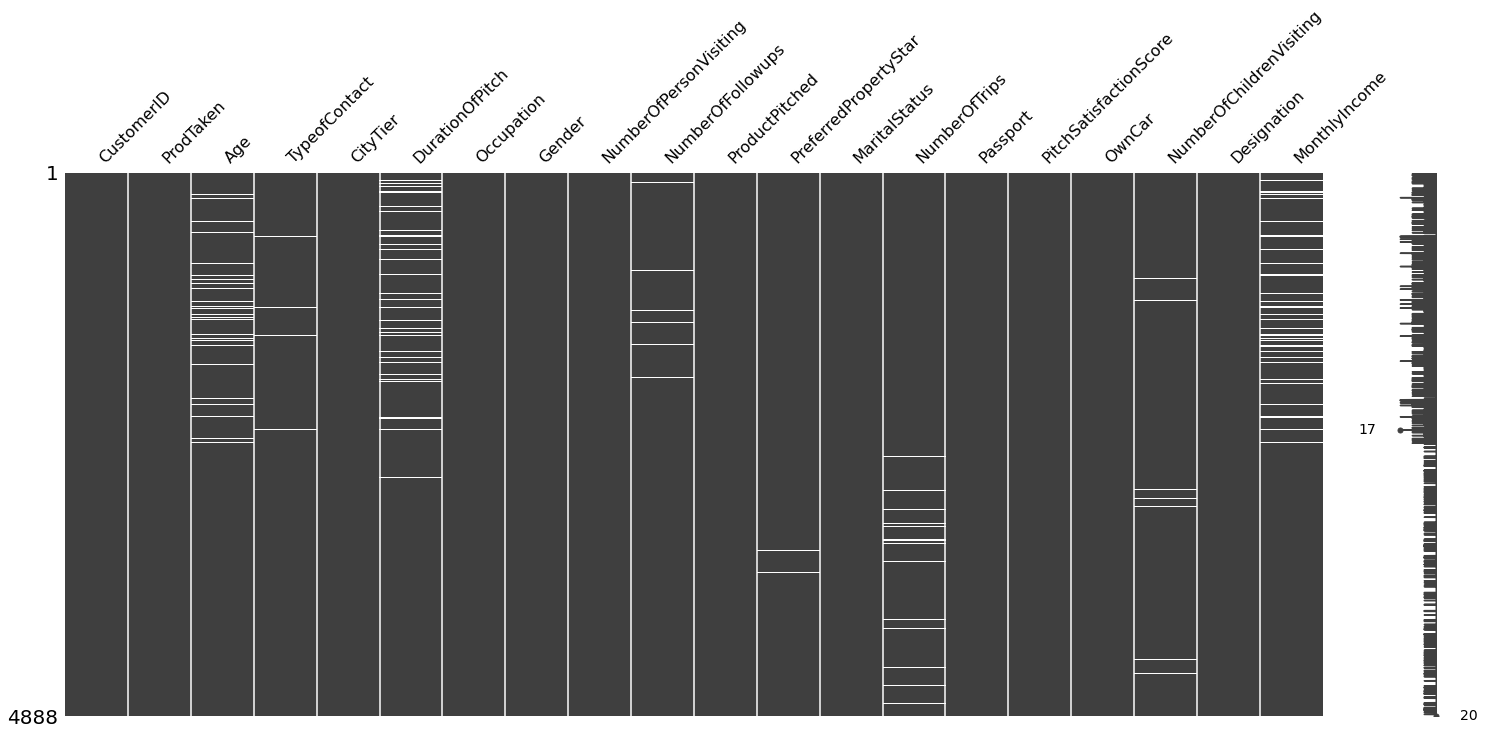

In [9]:
import missingno as msno
msno.matrix(data)


Observation Missing Value in Age, Type of contact,Duration of pitch,Number of followups,preferred property stars,Noof trips No of children visitor,Monthly income that needs to be fixed.

# Exploratory Data Analysis

###  Age Distribution

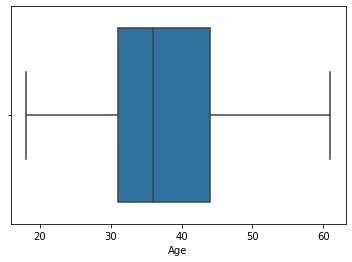

In [10]:
sns.boxplot(data.Age)

AgeRange : from 18-60

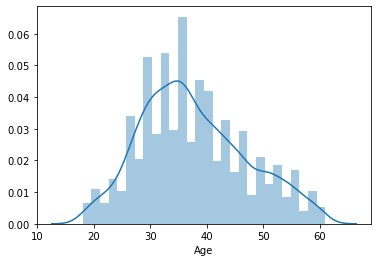

In [11]:
sns.distplot(data.Age)

Observation :
<li>Age doesnt seems to be skewed and not many outlier so can be treated with mean value</li>
<li>We have 4.5% missing value in Age</li>

### Duration of Pitch 

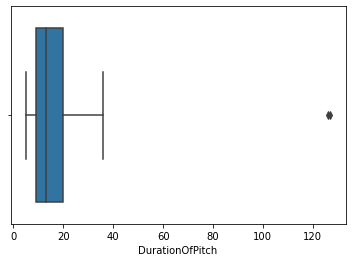

In [12]:
sns.boxplot(data.DurationOfPitch)

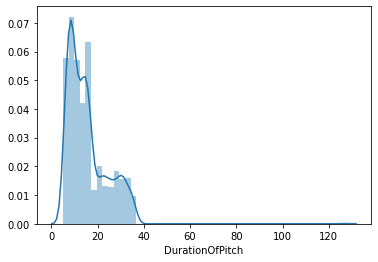

In [13]:
sns.distplot(data.DurationOfPitch)

### Noof Followups

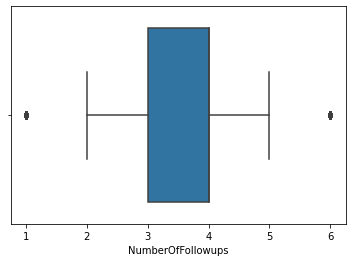

In [14]:
sns.boxplot(data.NumberOfFollowups)

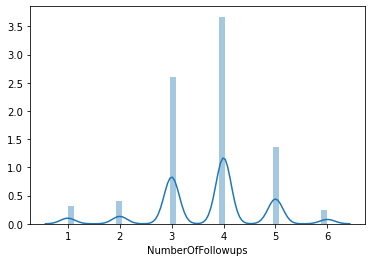

In [15]:
sns.distplot(data.NumberOfFollowups)

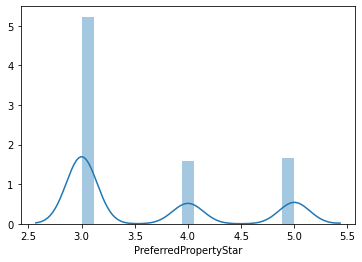

In [16]:
sns.distplot(data.PreferredPropertyStar)

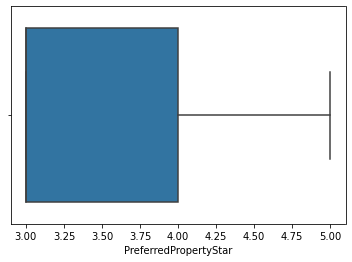

In [17]:
sns.boxplot(data.PreferredPropertyStar)

## Panda Profiling

In [18]:
!pip install pandas-profiling==2.8.0
data=pd.read_csv("Tourism1.csv")
from pandas_profiling import ProfileReport

In [19]:
prof = ProfileReport(data)
# to view report created by pandas profile
prof

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Observation from Panda Profiling

<b>Observation</b>:
<ol>
    <li>we have 4888 rows and 1012 has missing values close to 21 % of the rows has some missing values</li>
    <li>There are no Duplicate rows</li>
    <li>We have 9 categorical Variable and 8 Numerical variable and 3 Boolean Variable</li>
    <li>Customer ID all seems to be unique values without Duplicate values and no missing values</li>
    <li>In Product Taken we have 920 people who has taken and 3968 has not taken the product close to 23 % of the people has taken the Product No Missing Values  </li>
    <li> Age range is from min of 18 to maximum of 61 and few missing values which is close to 4.5 % are missing</li>
    <li>Type of contact         
        <ul>Self enquiry-3444 seems to be more </ul>
        <ul>company invited-1419</ul>
            <ul>--- we have .5% of this value missing</ul>
    </li>
    <li>City
        <ul>Tier 1 is the most value one (3190 count) </ul>
        <ul>next comes the tier 3 (1500) </ul>
        <ul>then comes the tier 2 (198)</ul>
        there is no missing values</li>
    <li>Duration of pitch on an average is 15 and we have 5% of the data missing here</li>
    <li> Occupation 
        <ul>Salaried is more- 2368 of them</ul>
        <ul>then comes the small business  2064 - of them</ul>
        <ul>then the large business 434</ul>
        <ul>then the freelancer-2 </ul>
     there are no missing values</li>
    <li> We have Male and Female and we need to do some cleaning here as well</li>
    <li> Male seems to be more than female here and some cleaning is yet to be done as we have another type as Fe Male No missing values</li>
    <li>No of person visiting seems to be a min 1 to max five and on an average 3, there are NO missing values here which should be treated</li>
    <li>No of followups made by a sales person to customer ranges from 1-6 and on an average 4 ~.There are 45 missing values in this that should be treated.</li>
    <li>The Product pitched that tops is
        <ul>the Basic-1842(37%)</ul> 
        <ul>then comes Deluxe-1732(35%)</ul>
        <ul>then standard-742(15%)</ul>
        <ul>Super Deluxe-342(.07%)</ul>
        <ul>King-230(0.04%) </ul> 
         are the products.</li>
    <li>Marital status-
    <ul>Married -2340 (47%) </ul>
            <ul>Divorced-950(19%)</ul>
            <ul>Single-916(18%)</ul>
            <ul>unmarried-682(14%)</ul></li>
    <li> No of trips -We have some missing values 2.9% are missing and on an average 3 rips are made. the data is right skewed.</li>
    <li>Passport
        <ul>1422- has passport-29%</ul>
        <ul>3466- do not have passport-70%</ul>
    </li>
    <li> On an average Pitch satisfaction score is 3</li>
    <li>3032-(62%)-owns a car and 37% do not own a car</li>
    <li>No of children
        <ul>1-2080-42%- has one child</ul>
        <ul>2-1335-27% - has two children</ul>
        <ul>0-1082-22%- has no children</ul>
        <ul>3-325-.06%- has three children</ul></li>
    <li>Designation-we have Executive managers which tops the list and then Manager and then senior manager AVP and VP</li>
    <li> Average monthly Income is 23619 and we have some Missing values</li>
           
 
    
    
    
    

## Bivariate Analysis

###  Product taken vs Age

In [20]:
### Function to plot boxplot
def boxplot(x):
    plt.figure(figsize=(10,7))
    sns.boxplot(data=data, x="ProdTaken",y=data[x],palette="PuBu")
    plt.show()

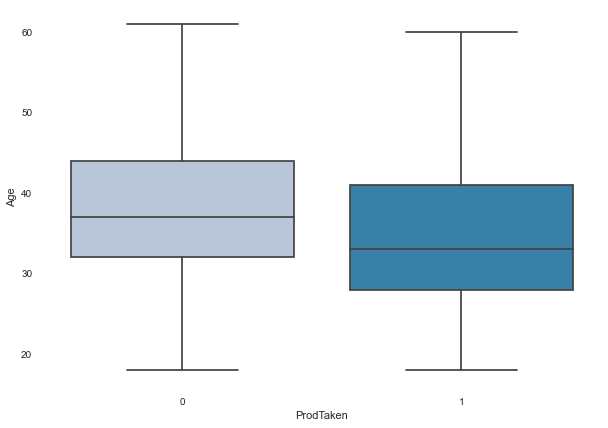

In [21]:
boxplot('Age')

Observation: Younger age Groups tend to have taken the Product than the one above 40

In [22]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

### Product Taken vs type of contact

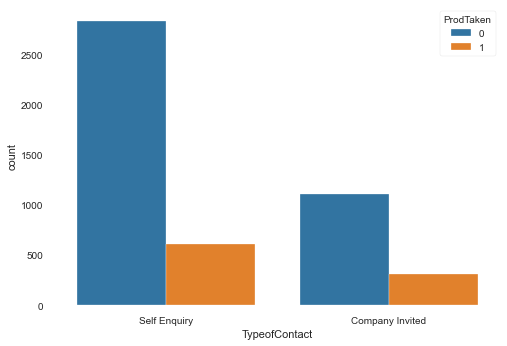

In [23]:
sns.countplot(x='TypeofContact',data=data,hue='ProdTaken')

Selfenquiry seem to have taken more than the company invited

### Product Taken vs City tier

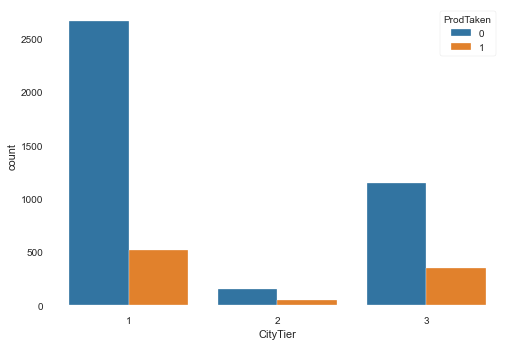

In [24]:
sns.countplot(x='CityTier',data=data,hue='ProdTaken')

The one in City tier 1 seem to have taken the product more that the one in 2 and 3 

### Prodtaken vs Duration of pitch

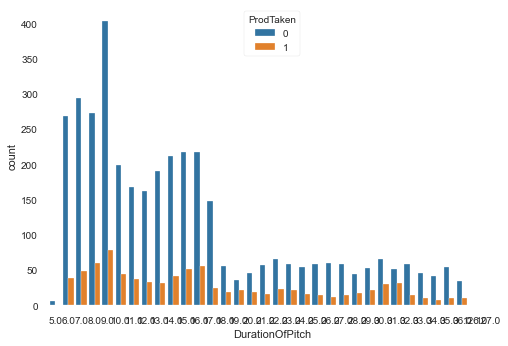

In [25]:
sns.countplot(x='DurationOfPitch',data=data,hue='ProdTaken')

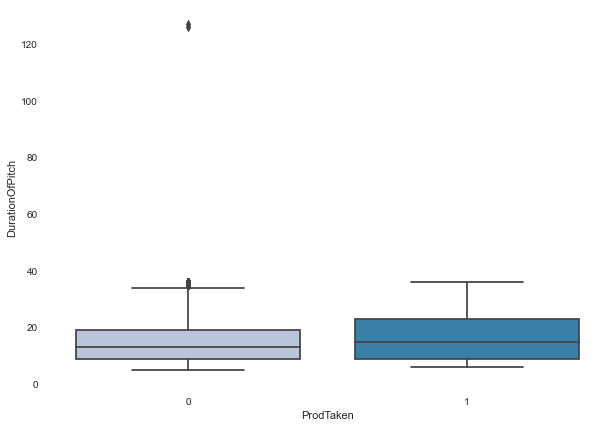

In [26]:
boxplot('DurationOfPitch')

Duration of pitch doesnt seems to have much impact on customer who took the product and the one who dint take it.

### Product taken vs Occupation

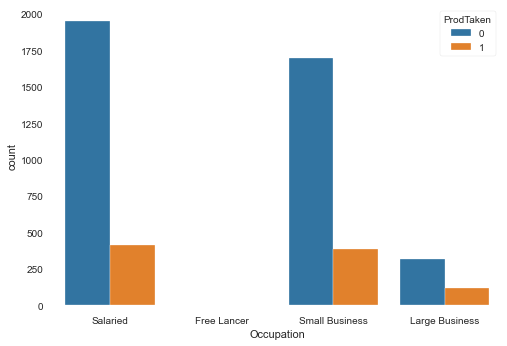

In [27]:
sns.countplot(x='Occupation',data=data,hue='ProdTaken')

Salaried seem to have takenthe product more than other category and small business people as well has taken then comparitively more than large business there are no one who took that from freelancer

### Product taken vs Gender

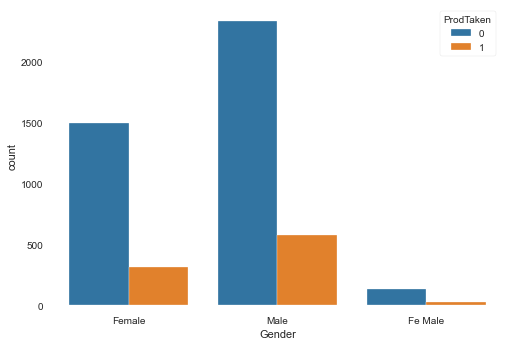

In [28]:
sns.countplot(x='Gender',data=data,hue='ProdTaken')

Male seem to have taken the product more than female

### Product taken vs No of person visiting

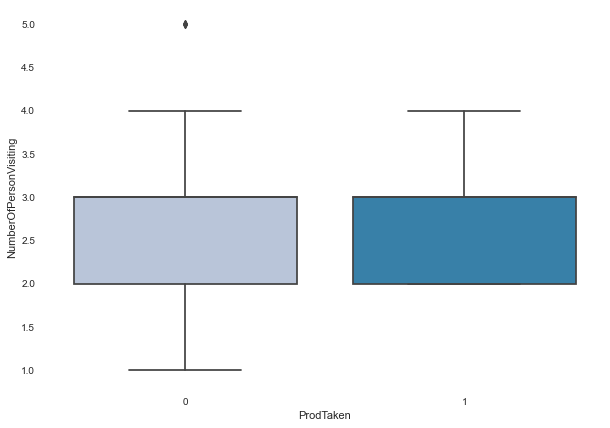

In [29]:
boxplot('NumberOfPersonVisiting')

Amoung the people who has taken the product there are 2 people and more

### Product taken vs No of follow ups

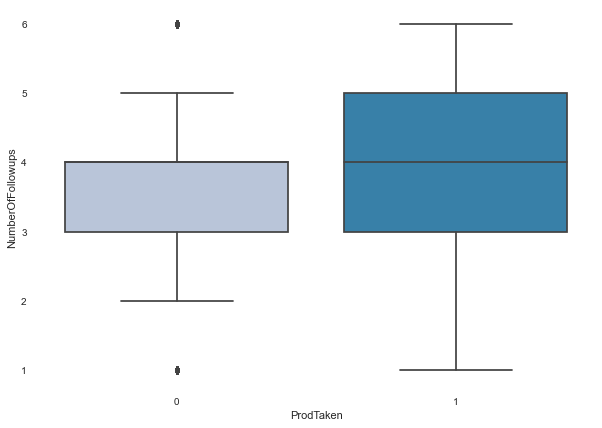

In [30]:
boxplot('NumberOfFollowups')

### Product taken Vs Product Pitched

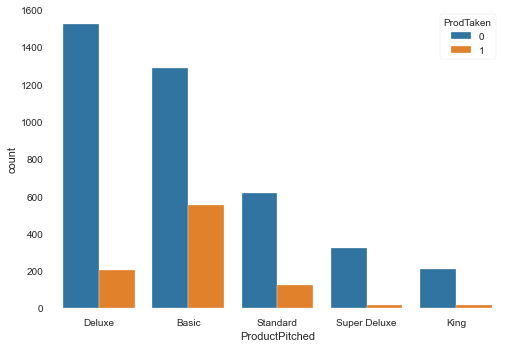

In [31]:
sns.countplot(x='ProductPitched',data=data,hue='ProdTaken')

The top is Basic and then Deluxe and standard and Superdeluxe and King seems to be min

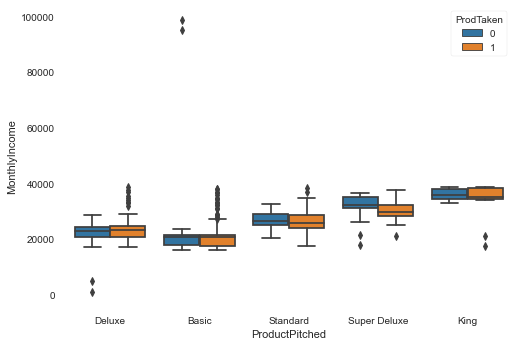

In [32]:
sns.boxplot(x='ProductPitched',y='MonthlyIncome',data=data,hue='ProdTaken')

Then one who has a higher salary range seem to have opted for super deluxe and King Products.

### PreferredPropertyStar vs Product Taken

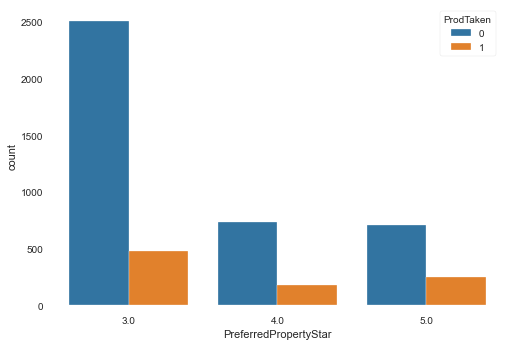

In [33]:
sns.countplot(x='PreferredPropertyStar',data=data,hue='ProdTaken')

Amoung the customer taken the Product Preferred Property star is 3.0

### Product taken vs Preferred Marital status

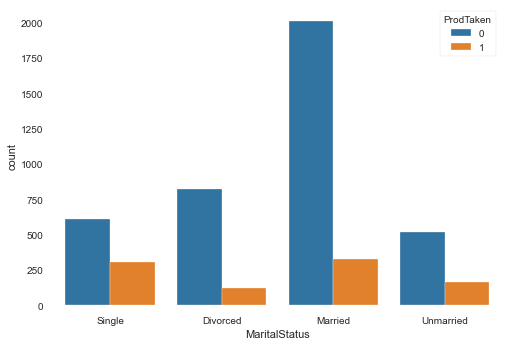

In [34]:
sns.countplot(x='MaritalStatus',data=data,hue='ProdTaken')

In [35]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

### Product taken vs No of Trips

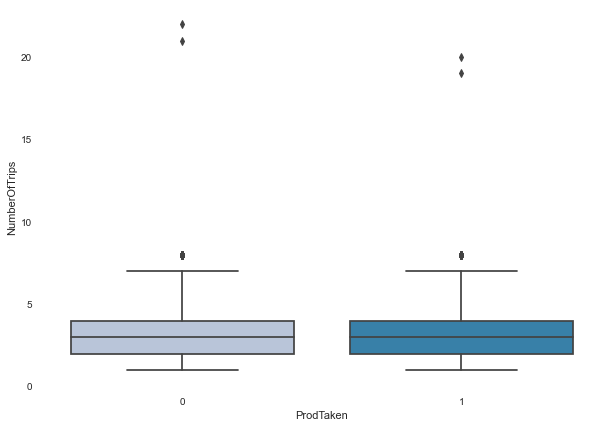

In [36]:
boxplot('NumberOfTrips')

On an average3 trips were taken

### Product taken vs Monthly Income

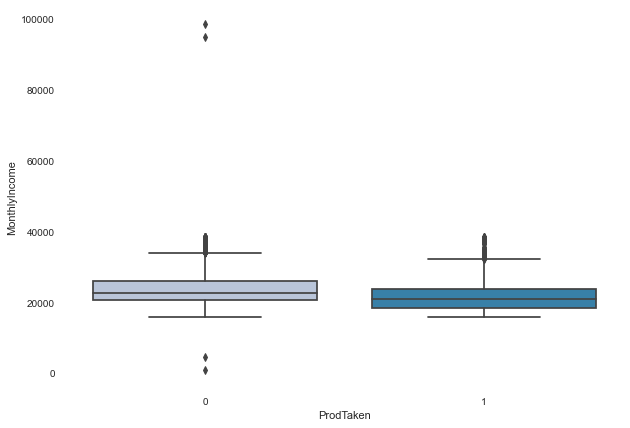

In [37]:
boxplot('MonthlyIncome')

### Heat Map

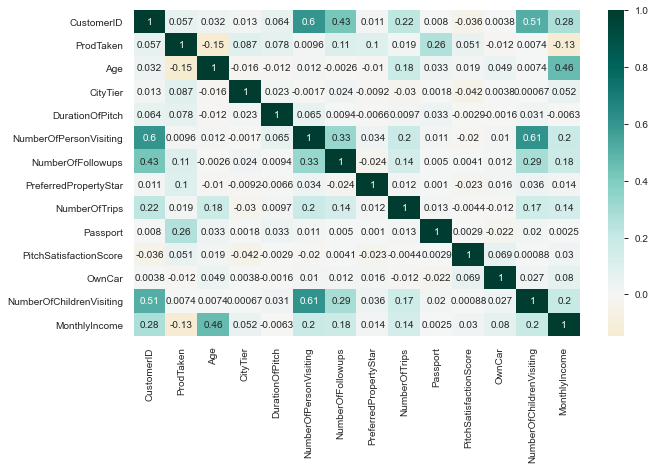

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), center=0, cmap='BrBG', annot=True)

In [39]:
#sns.pairplot(data)


   
  ###  Correlation Interpretation 
 <li> Product Taken is positively correlated with </li>
     <ul>city tier</ul>
     <ul>Passport</ul>
     <ul>Duration of Pitch</ul>
     <ul>No of follow ups</ul>
     <ul>Preferred property star</ul>
     <ul>No of Children visiting</ul>

 <li> Product Taken is negetively correlated to </li>
     <ul>Age</ul>
     <ul>Monthly Income</ul>
    

# Feature Engineering

## Treating Missing Values

From the previous Ananlysis in Data we find that for the Age ,Duration of pitch,Noof followups,Monthlyincome,Noofchildrenvisitor,Nooftrips,we are replacing the missing values with the mean values and dropping the rest missing in type ofcontact as they are very minimal .

In [40]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [41]:
data['DurationOfPitch'] = data['DurationOfPitch'].fillna(data['DurationOfPitch'].mean())

In [42]:
data['NumberOfFollowups'] = data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].mean())

In [43]:
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].median())

In [44]:
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean())

In [45]:
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean())

In [46]:

data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mean())


In [47]:
data['NumberOfTrips'] = data['NumberOfTrips'].fillna(data['NumberOfTrips'].mean())

In [48]:
data['TypeofContact'].isnull().value_counts()

False    4863
True       25
Name: TypeofContact, dtype: int64

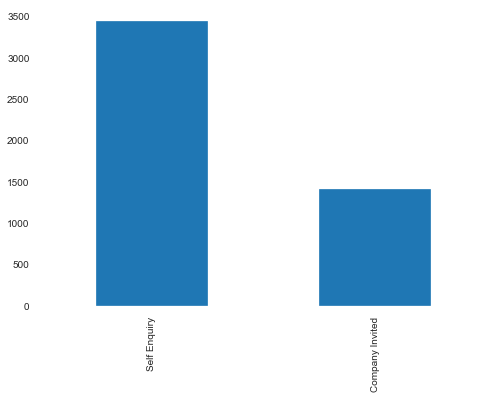

In [49]:
data['TypeofContact'].value_counts().plot.bar()

In [50]:
data.dropna(inplace=True)

### Visualise the missing data if any after treating missing values

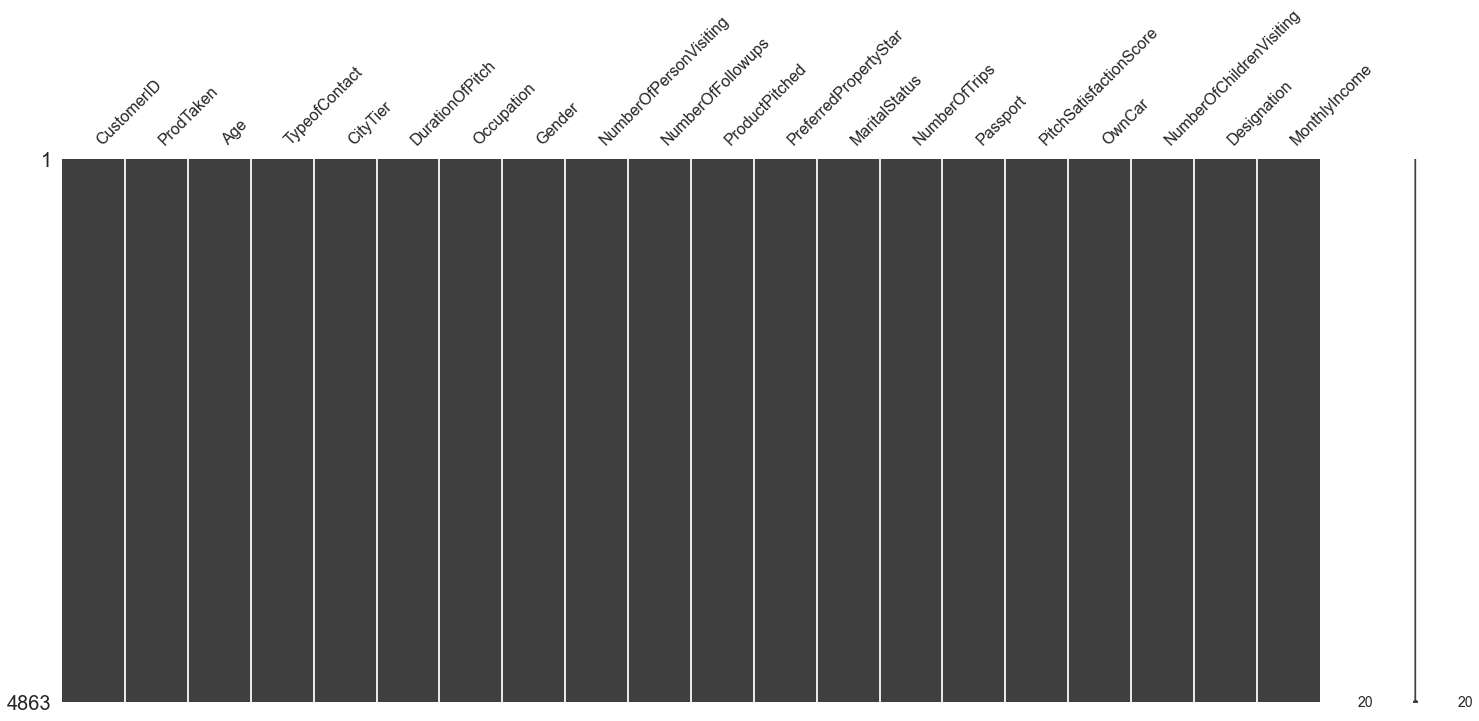

In [51]:
import missingno as msno
msno.matrix(data)

In [52]:
data.head(10)

CustomerID  ProdTaken        Age    TypeofContact  CityTier  \
0      200000          1  41.000000     Self Enquiry         3   
1      200001          0  49.000000  Company Invited         1   
2      200002          1  37.000000     Self Enquiry         1   
3      200003          0  33.000000  Company Invited         1   
4      200004          0  37.622265     Self Enquiry         1   
5      200005          0  32.000000  Company Invited         1   
6      200006          0  59.000000     Self Enquiry         1   
7      200007          0  30.000000     Self Enquiry         1   
8      200008          0  38.000000  Company Invited         1   
9      200009          0  36.000000     Self Enquiry         1   

   DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
0              6.0        Salaried  Female                       3   
1             14.0        Salaried    Male                       3   
2              8.0     Free Lancer    Male                       3   
3              9.0        Salaried  Female                       2   
4              8.0  Small Business    Male                       2   
5              8.0        Salaried    Male                       3   
6              9.0  Small Business  Female                       2   
7             30.0        Salaried    Male                       3   
8             29.0        Salaried    Male                       2   
9             33.0  Small Business    Male                       3   

   NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
0                3.0         Deluxe                    3.0        Single   
1                4.0         Deluxe                    4.0      Divorced   
2                4.0          Basic                    3.0        Single   
3                3.0          Basic                    3.0      Divorced   
4                3.0          Basic                    4.0      Divorced   
5                3.0          Basic                    3.0        Single   
6                2.0          Basic                    5.0      Divorced   
7                3.0          Basic                    3.0       Married   
8                4.0       Standard                    3.0     Unmarried   
9                3.0         Deluxe                    3.0      Divorced   

   NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
0            1.0         1                       2       1   
1            2.0         0                       3       1   
2            7.0         1                       3       0   
3            2.0         1                       5       1   
4            1.0         0                       5       1   
5            1.0         0                       5       1   
6            5.0         1                       2       1   
7            2.0         0                       2       0   
8            1.0         0                       3       0   
9            7.0         0                       3       1   

   NumberOfChildrenVisiting     Designation  MonthlyIncome  
0                       0.0         Manager        20993.0  
1                       2.0         Manager        20130.0  
2                       0.0       Executive        17090.0  
3                       1.0       Executive        17909.0  
4                       0.0       Executive        18468.0  
5                       1.0       Executive        18068.0  
6                       1.0       Executive        17670.0  
7                       1.0       Executive        17693.0  
8                       0.0  Senior Manager        24526.0  
9                       0.0         Manager        20237.0

## Gender extra space in Female Values are treated

In [53]:
data['Gender'] = data['Gender'].replace('Fe Male', 'Female')

In [54]:
data['Gender'].value_counts()

Male      2901
Female    1962
Name: Gender, dtype: int64

We treated all the missing Values where ever possible with mean and dropped few missing values in Type of contact and replaced Few data that was crooked in gender column.

## Treating the outlier

In [55]:
df=data.copy()
df.head(5)

CustomerID  ProdTaken        Age    TypeofContact  CityTier  \
0      200000          1  41.000000     Self Enquiry         3   
1      200001          0  49.000000  Company Invited         1   
2      200002          1  37.000000     Self Enquiry         1   
3      200003          0  33.000000  Company Invited         1   
4      200004          0  37.622265     Self Enquiry         1   

   DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
0              6.0        Salaried  Female                       3   
1             14.0        Salaried    Male                       3   
2              8.0     Free Lancer    Male                       3   
3              9.0        Salaried  Female                       2   
4              8.0  Small Business    Male                       2   

   NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
0                3.0         Deluxe                    3.0        Single   
1                4.0         Deluxe                    4.0      Divorced   
2                4.0          Basic                    3.0        Single   
3                3.0          Basic                    3.0      Divorced   
4                3.0          Basic                    4.0      Divorced   

   NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
0            1.0         1                       2       1   
1            2.0         0                       3       1   
2            7.0         1                       3       0   
3            2.0         1                       5       1   
4            1.0         0                       5       1   

   NumberOfChildrenVisiting Designation  MonthlyIncome  
0                       0.0     Manager        20993.0  
1                       2.0     Manager        20130.0  
2                       0.0   Executive        17090.0  
3                       1.0   Executive        17909.0  
4                       0.0   Executive        18468.0

In [56]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

### Converting Boolean and categorical variables to categorical instead of int/float/object

In [57]:
data['ProdTaken'] = data['ProdTaken'].astype('category')
data['TypeofContact'] = data['TypeofContact'].astype('category')
data['CityTier'] = data['CityTier'].astype('category')

In [58]:
data['Occupation'] = data['Occupation'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['ProductPitched'] = data['ProductPitched'].astype('category')
data['MaritalStatus'] = data['MaritalStatus'].astype('category')
data['Passport'] = data['Passport'].astype('category')
data['OwnCar'] = data['OwnCar'].astype('category')
data['Designation'] = data['Designation'].astype('category')


In [59]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
numerical_col

['CustomerID',
 'Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'PitchSatisfactionScore',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [60]:
data.dtypes

CustomerID                     int64
ProdTaken                   category
Age                          float64
TypeofContact               category
CityTier                    category
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                    category
PitchSatisfactionScore         int64
OwnCar                      category
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

### Ploting the graph before treating outlier

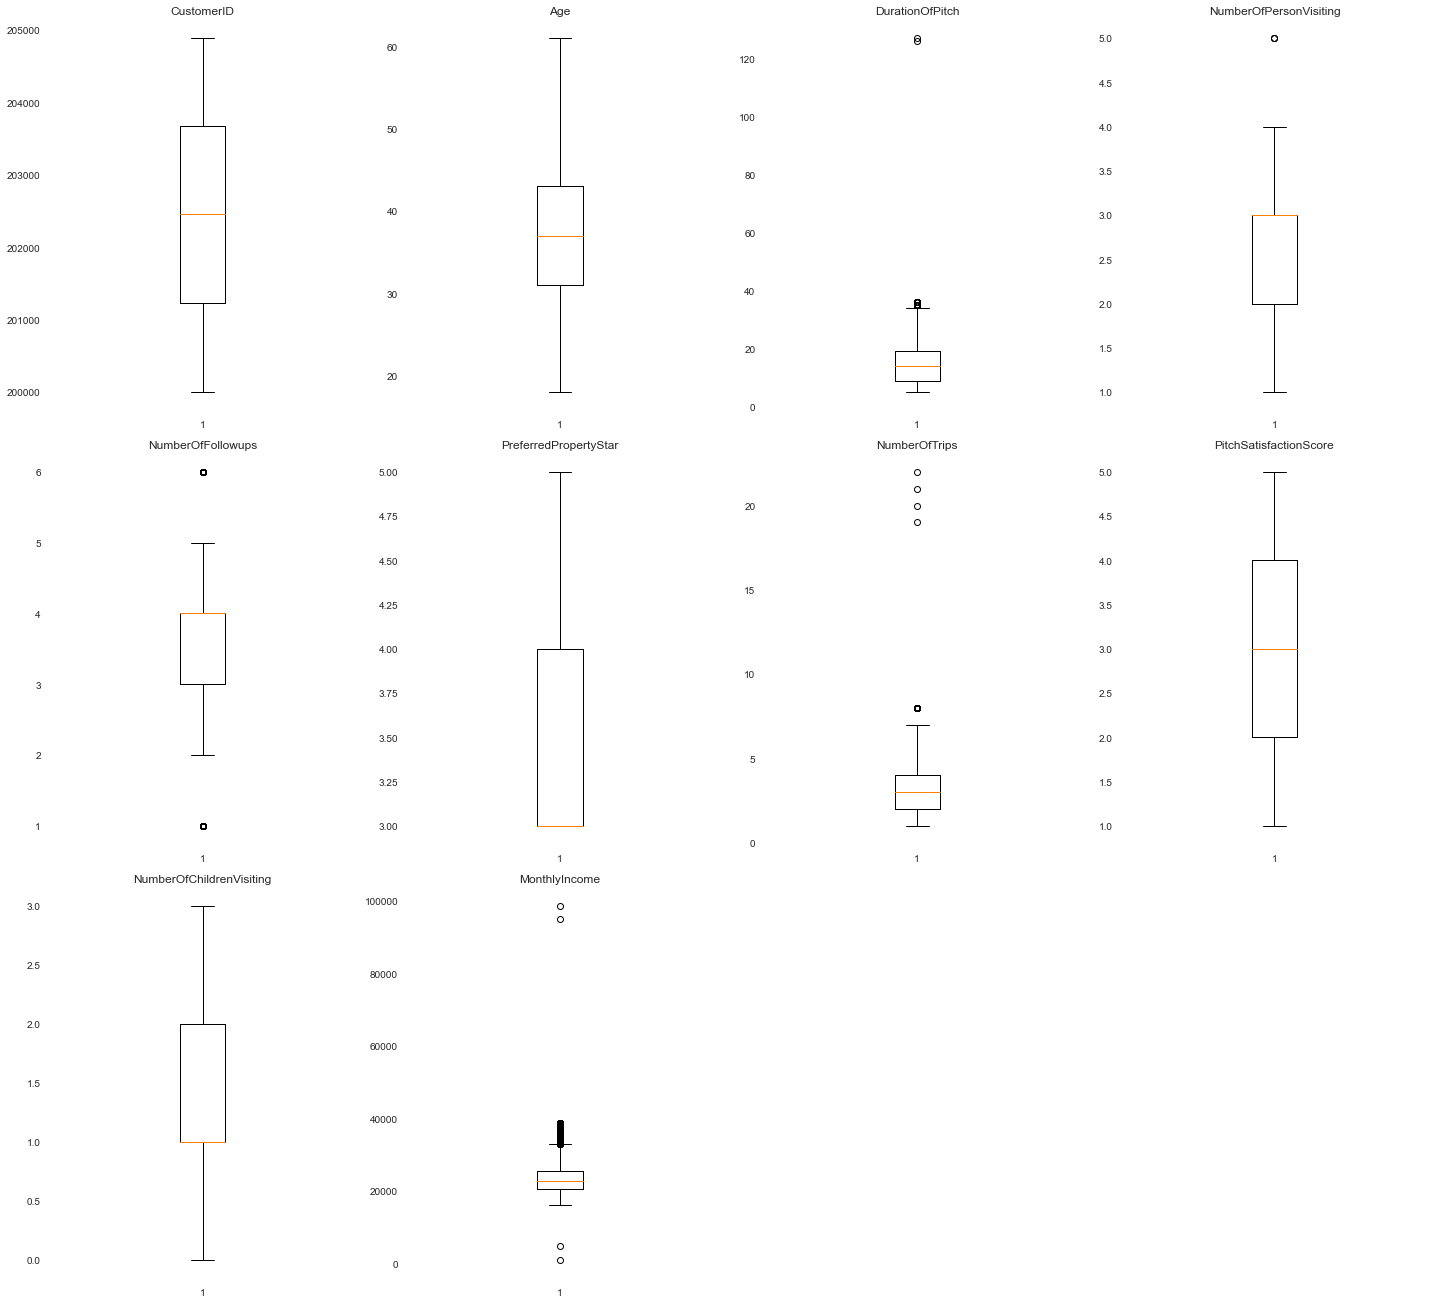

In [61]:
# lets look at box plot to see outliers and find that has to be treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [62]:
# Lets treat outliers by flooring and capping
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data

In [63]:

data = treat_outliers_all(data,numerical_col)


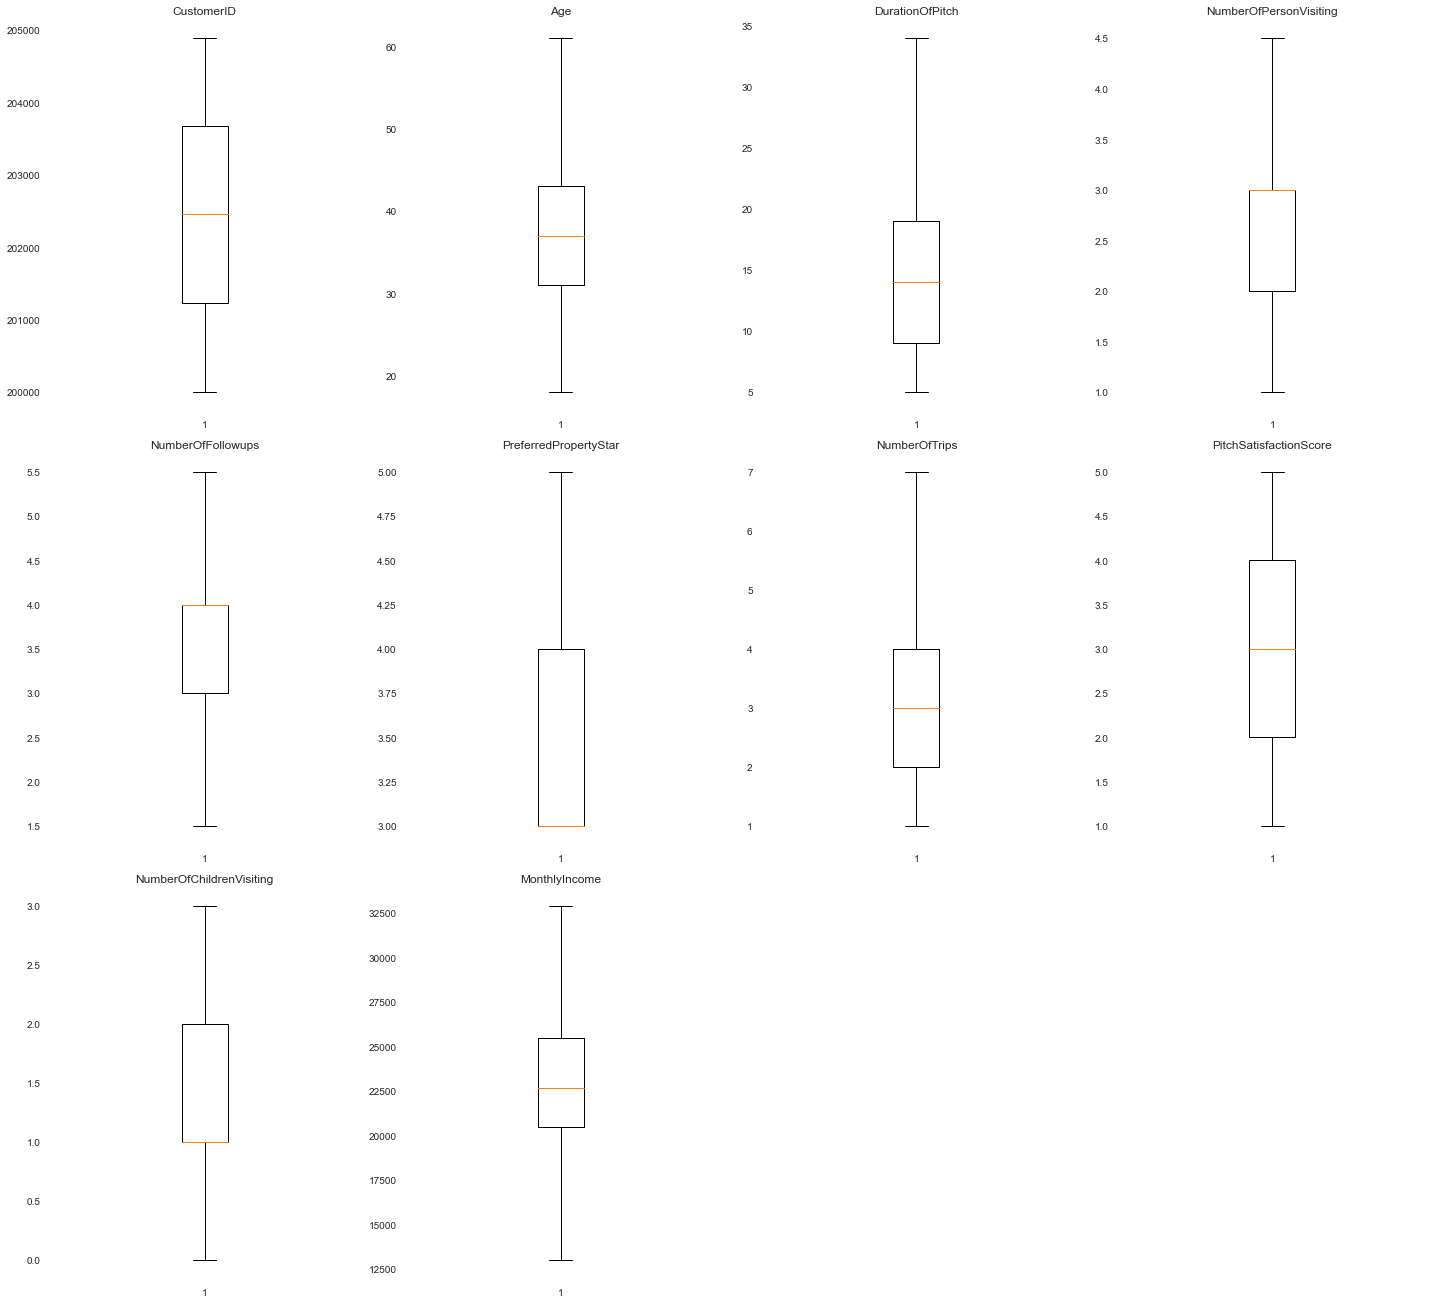

In [64]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

Outlier are treated using flooring and capping in all the above 10 columns

### Converting few col back to int as it is more convenient to use it in modeling 

In [65]:
data['ProdTaken'] = data['ProdTaken'].astype('int')

In [66]:
data['Passport'] = data['Passport'].astype('int')
data['OwnCar'] = data['OwnCar'].astype('int')
data['CityTier'] = data['CityTier'].astype('int')

In [67]:
data.dtypes


CustomerID                     int64
ProdTaken                      int32
Age                          float64
TypeofContact               category
CityTier                       int32
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting       float64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                       int32
PitchSatisfactionScore         int64
OwnCar                         int32
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

## One hot encoding Categorical and boolean

we have 6 categorical variable to hot encode

In [68]:
data1=pd.get_dummies(data.TypeofContact)

In [69]:
data.head(10)

CustomerID  ProdTaken        Age    TypeofContact  CityTier  \
0      200000          1  41.000000     Self Enquiry         3   
1      200001          0  49.000000  Company Invited         1   
2      200002          1  37.000000     Self Enquiry         1   
3      200003          0  33.000000  Company Invited         1   
4      200004          0  37.622265     Self Enquiry         1   
5      200005          0  32.000000  Company Invited         1   
6      200006          0  59.000000     Self Enquiry         1   
7      200007          0  30.000000     Self Enquiry         1   
8      200008          0  38.000000  Company Invited         1   
9      200009          0  36.000000     Self Enquiry         1   

   DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
0              6.0        Salaried  Female                     3.0   
1             14.0        Salaried    Male                     3.0   
2              8.0     Free Lancer    Male                     3.0   
3              9.0        Salaried  Female                     2.0   
4              8.0  Small Business    Male                     2.0   
5              8.0        Salaried    Male                     3.0   
6              9.0  Small Business  Female                     2.0   
7             30.0        Salaried    Male                     3.0   
8             29.0        Salaried    Male                     2.0   
9             33.0  Small Business    Male                     3.0   

   NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
0                3.0         Deluxe                    3.0        Single   
1                4.0         Deluxe                    4.0      Divorced   
2                4.0          Basic                    3.0        Single   
3                3.0          Basic                    3.0      Divorced   
4                3.0          Basic                    4.0      Divorced   
5                3.0          Basic                    3.0        Single   
6                2.0          Basic                    5.0      Divorced   
7                3.0          Basic                    3.0       Married   
8                4.0       Standard                    3.0     Unmarried   
9                3.0         Deluxe                    3.0      Divorced   

   NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
0            1.0         1                       2       1   
1            2.0         0                       3       1   
2            7.0         1                       3       0   
3            2.0         1                       5       1   
4            1.0         0                       5       1   
5            1.0         0                       5       1   
6            5.0         1                       2       1   
7            2.0         0                       2       0   
8            1.0         0                       3       0   
9            7.0         0                       3       1   

   NumberOfChildrenVisiting     Designation  MonthlyIncome  
0                       0.0         Manager        20993.0  
1                       2.0         Manager        20130.0  
2                       0.0       Executive        17090.0  
3                       1.0       Executive        17909.0  
4                       0.0       Executive        18468.0  
5                       1.0       Executive        18068.0  
6                       1.0       Executive        17670.0  
7                       1.0       Executive        17693.0  
8                       0.0  Senior Manager        24526.0  
9                       0.0         Manager        20237.0

In [70]:
data2=pd.get_dummies(data.Occupation)

In [71]:
data3=pd.get_dummies(data.Gender)

In [72]:
data4=pd.get_dummies(data.ProductPitched)

In [73]:
data5=pd.get_dummies(data.MaritalStatus)

In [74]:
data6=pd.get_dummies(data.Designation)

In [75]:
data_final=pd.concat([data,data1,data2,data3,data4,data5,data6],axis='columns')

In [76]:
data_final.head(10)

CustomerID  ProdTaken        Age    TypeofContact  CityTier  \
0      200000          1  41.000000     Self Enquiry         3   
1      200001          0  49.000000  Company Invited         1   
2      200002          1  37.000000     Self Enquiry         1   
3      200003          0  33.000000  Company Invited         1   
4      200004          0  37.622265     Self Enquiry         1   
5      200005          0  32.000000  Company Invited         1   
6      200006          0  59.000000     Self Enquiry         1   
7      200007          0  30.000000     Self Enquiry         1   
8      200008          0  38.000000  Company Invited         1   
9      200009          0  36.000000     Self Enquiry         1   

   DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
0              6.0        Salaried  Female                     3.0   
1             14.0        Salaried    Male                     3.0   
2              8.0     Free Lancer    Male                     3.0   
3              9.0        Salaried  Female                     2.0   
4              8.0  Small Business    Male                     2.0   
5              8.0        Salaried    Male                     3.0   
6              9.0  Small Business  Female                     2.0   
7             30.0        Salaried    Male                     3.0   
8             29.0        Salaried    Male                     2.0   
9             33.0  Small Business    Male                     3.0   

   NumberOfFollowups  ... Super Deluxe  Divorced Married  Single  Unmarried  \
0                3.0  ...            0         0       0       1          0   
1                4.0  ...            0         1       0       0          0   
2                4.0  ...            0         0       0       1          0   
3                3.0  ...            0         1       0       0          0   
4                3.0  ...            0         1       0       0          0   
5                3.0  ...            0         0       0       1          0   
6                2.0  ...            0         1       0       0          0   
7                3.0  ...            0         0       1       0          0   
8                4.0  ...            0         0       0       0          1   
9                3.0  ...            0         1       0       0          0   

   AVP  Executive  Manager Senior Manager  VP  
0    0          0        1              0   0  
1    0          0        1              0   0  
2    0          1        0              0   0  
3    0          1        0              0   0  
4    0          1        0              0   0  
5    0          1        0              0   0  
6    0          1        0              0   0  
7    0          1        0              0   0  
8    0          0        0              1   0  
9    0          0        1              0   0  

[10 rows x 42 columns]

In [77]:
data_modelready=data_final.drop(['TypeofContact','Gender','Occupation','Designation','MaritalStatus','ProductPitched'],axis='columns')

In [78]:
data_modelready.dtypes

CustomerID                    int64
ProdTaken                     int32
Age                         float64
CityTier                      int32
DurationOfPitch             float64
NumberOfPersonVisiting      float64
NumberOfFollowups           float64
PreferredPropertyStar       float64
NumberOfTrips               float64
Passport                      int32
PitchSatisfactionScore        int64
OwnCar                        int32
NumberOfChildrenVisiting    float64
MonthlyIncome               float64
Company Invited               uint8
Self Enquiry                  uint8
Free Lancer                   uint8
Large Business                uint8
Salaried                      uint8
Small Business                uint8
Female                        uint8
Male                          uint8
Basic                         uint8
Deluxe                        uint8
King                          uint8
Standard                      uint8
Super Deluxe                  uint8
Divorced                    

In [79]:
data.nunique()

CustomerID                  4863
ProdTaken                      2
Age                           45
TypeofContact                  2
CityTier                       3
DurationOfPitch               31
Occupation                     4
Gender                         2
NumberOfPersonVisiting         5
NumberOfFollowups              7
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                  8
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       5
Designation                    5
MonthlyIncome               2268
dtype: int64

# Metric that was chosen to be considered and reason behind it 


<li>From the Data set we see that Product taken will be taken to predict the customer who would be more likely to get the travel package that will be newly introduced.</li>
<li>The <b>Data set seems to be Unbalanced</b> from Product taken column </li>
<li>920 people has taken and 3968 has not taken the product</li>
<li><b>close to 23 % of the people has taken it</b> and the rest is 77% has not taken it </li>
<li>We can see the data is more inclined towards a unbalanced set so <b>we are considering Recall and precision rather than accuracy </b></li>
<li>We are  also going to <b>calculate the AUC to see the performance of the model</b></li>


## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person than wont accept the package and the person will accept it
2. Predicting a person will accept, and the person doesn't accepts the package.

### Which case is more important? 
* Predicting a person than wont accept the package and the person will accept it.

### Which metric to optimize?
* We would want Recall to be maximized, the greater the Recall higher the chances of minimizing false negatives because if a model predicts that a person will accept it  and in reality, that person doesn't accepts then that person eventually may buy then even if they werent the target but if we predict that a person will not buy the package  but the person has the potential to buy then that potential buyer is missed which is not what the business wants

# Split Data

In [80]:
X = data_modelready.drop('ProdTaken',axis=1)
y = data_modelready['ProdTaken'] 

In [81]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3404, 35) (1459, 35)
(3404,) (1459,)


**The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [82]:
y.value_counts(1)

0    0.811433
1    0.188567
Name: ProdTaken, dtype: float64

In [83]:
y_test.value_counts(1)

0    0.811515
1    0.188485
Name: ProdTaken, dtype: float64

## Function for metrics score

**Let's define function to provide recall scores on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [84]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Function for confusion matrix

In [85]:
### Function to make confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model Building-Bagging

## Decision Tree

Accuracy on training set :  1.0
Accuracy on test set :  0.8711446196024675
Recall on training set :  1.0
Recall on test set :  0.7018181818181818
Precision on training set :  1.0
Precision on test set :  0.6454849498327759


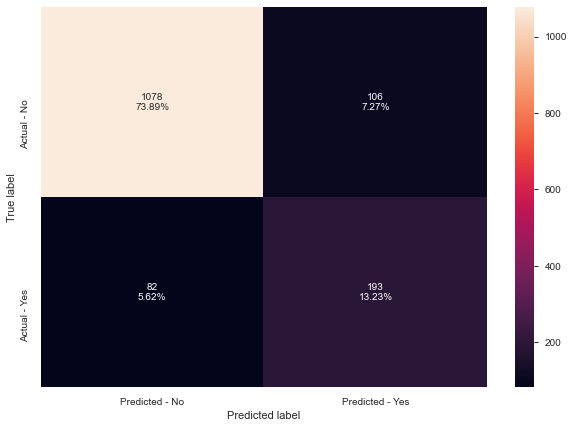

In [86]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

Decision tree is overfitting Accuracy ,Recall,Precision are having perfect score one

## Random Forest

Accuracy on training set :  0.9997062279670975
Accuracy on test set :  0.9136394790952708
Recall on training set :  0.9984423676012462
Recall on test set :  0.5818181818181818
Precision on training set :  1.0
Precision on test set :  0.935672514619883


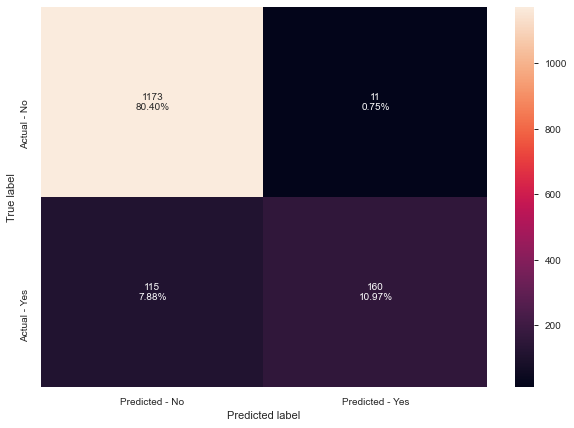

In [87]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

Random forest seems to be a little better than the decision tree as it is not overfitting but the recall value seems to be very low 58%

## Bagging Classifier

Accuracy on training set :  0.9908930669800236
Accuracy on test set :  0.914324880054832
Recall on training set :  0.9517133956386293
Recall on test set :  0.6290909090909091
Precision on training set :  1.0
Precision on test set :  0.8826530612244898


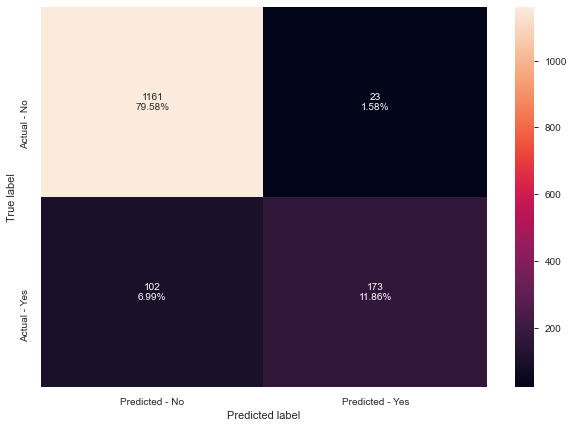

In [88]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

Bagging classifier recall value seems to be better than the random forest to 62%

# Model building performance tuning

## Tuning Decision Tree

In [89]:

#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=7,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=15, random_state=1)

Accuracy on training set :  0.8249118683901293
Accuracy on test set :  0.8128855380397533
Recall on training set :  0.6433021806853583
Recall on test set :  0.64
Precision on training set :  0.5294871794871795
Precision on test set :  0.5028571428571429


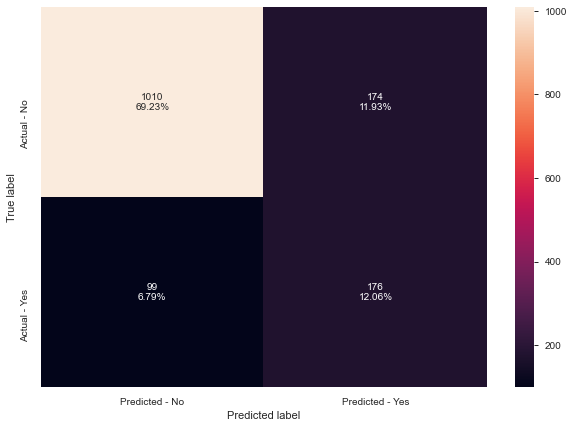

In [90]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

After decision tree tuning the recall value is slightly better than the random forest(58%) and the bagging (62%) classifier to 64% and accuracy 81%

In [142]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(dtree_estimator,feature_names=feature_names,show_weights=True))

|--- Passport <= 0.50
|   |--- CustomerID <= 204817.00
|   |   |--- Age <= 22.50
|   |   |   |--- PitchSatisfactionScore <= 2.50
|   |   |   |   |--- weights: [6.65, 0.00] class: 0
|   |   |   |--- PitchSatisfactionScore >  2.50
|   |   |   |   |--- weights: [11.20, 24.70] class: 1
|   |   |--- Age >  22.50
|   |   |   |--- PreferredPropertyStar <= 4.50
|   |   |   |   |--- weights: [607.60, 104.65] class: 0
|   |   |   |--- PreferredPropertyStar >  4.50
|   |   |   |   |--- Executive <= 0.50
|   |   |   |   |   |--- weights: [89.95, 24.05] class: 0
|   |   |   |   |--- Executive >  0.50
|   |   |   |   |   |--- DurationOfPitch <= 7.50
|   |   |   |   |   |   |--- weights: [11.90, 1.30] class: 0
|   |   |   |   |   |--- DurationOfPitch >  7.50
|   |   |   |   |   |   |--- weights: [19.95, 29.25] class: 1
|   |--- CustomerID >  204817.00
|   |   |--- weights: [0.00, 14.30] class: 1
|--- Passport >  0.50
|   |--- Executive <= 0.50
|   |   |--- CityTier <= 2.50
|   |   |   |--- NumberOfTr

## Using class_weights for random forest:

In [92]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 8),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=7,
                       random_state=1)

In [93]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.9095182138660399
Accuracy on test set :  0.8752570253598355
Recall on training set :  0.6931464174454829
Recall on test set :  0.5854545454545454
Precision on training set :  0.8003597122302158
Precision on test set :  0.7030567685589519


Using Class weight for random forest we have a lower recall(58%) but the accuracy seems to be better to be 87%

# Model Building boosting

## Building the model
- We are going to build 3 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

## AdaBoost Classifier

In [95]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [96]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [97]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8654524089306698
Accuracy on test set :  0.8793694311172036
Recall on training set :  0.3894080996884735
Recall on test set :  0.4727272727272727
Precision on training set :  0.7911392405063291
Precision on test set :  0.8074534161490683


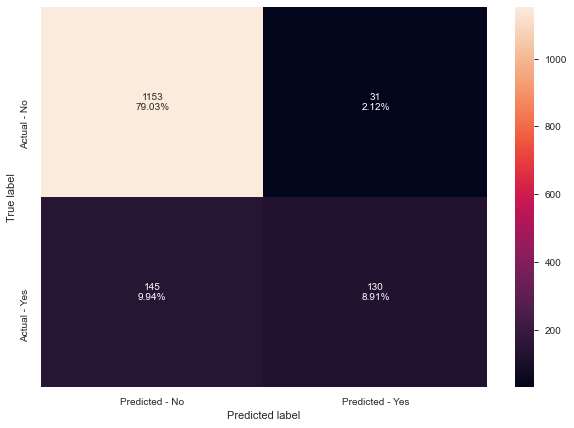

In [98]:
make_confusion_matrix(abc,y_test)

Observation Ada boosting has recall -the recall is very low  47% and precision of 87%

## Gradient Boosting classifier

In [99]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [100]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8874853113983548
Accuracy on test set :  0.8779986291980809
Recall on training set :  0.4672897196261682
Recall on test set :  0.43272727272727274
Precision on training set :  0.8797653958944281
Precision on test set :  0.8439716312056738


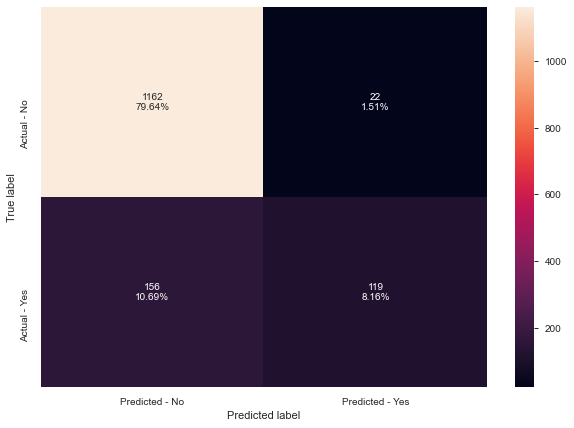

In [101]:
make_confusion_matrix(gbc,y_test)

GB Classifier again has a very low recall value 43% and precision is 84%

## XGBooster Classifier

In [102]:
from xgboost import XGBClassifier

In [103]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[20:56:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9997062279670975
Accuracy on test set :  0.9335161069225497
Recall on training set :  0.9984423676012462
Recall on test set :  0.72
Precision on training set :  1.0
Precision on test set :  0.908256880733945


XGB has a better recall here than ADA-47% and GB-43%  as 72%

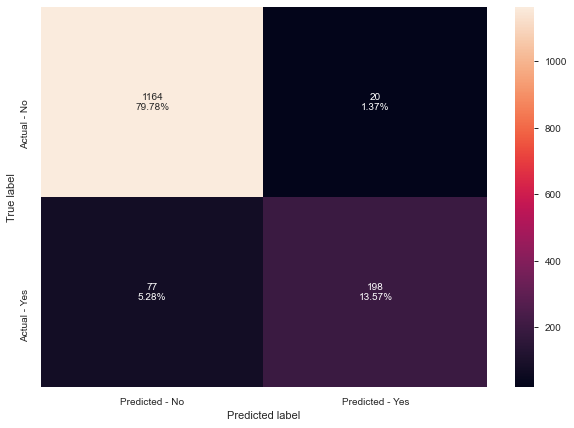

In [105]:
make_confusion_matrix(xgb,y_test)

# Model -Hyperparameter tuning-ADAboosting GB,XGB

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

## ADA boost classifier

In [108]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,50,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.9000000000000001, n_estimators=10,
                   random_state=1)

In [109]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.8425381903642774
Accuracy on test set :  0.8334475668265936
Recall on training set :  0.5903426791277259
Recall on test set :  0.6072727272727273
Precision on training set :  0.5812883435582822
Precision on test set :  0.5529801324503312


observation :-Recall rate is better here which is 60% than the ADA boost without hypertuning -47%

## AUC score

In [123]:
from sklearn.metrics import roc_auc_score
y_pred=abc_tuned.predict(X_test)
roc_auc_score(y_test,y_pred)

0.7466262285012286

observation :-
 AUC score also shows that the model is pretty good 

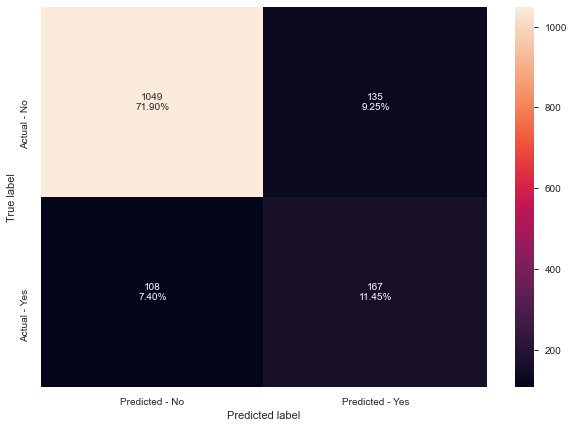

In [110]:
make_confusion_matrix(abc_tuned,y_test)

## ABC_Tuned: Feature importance

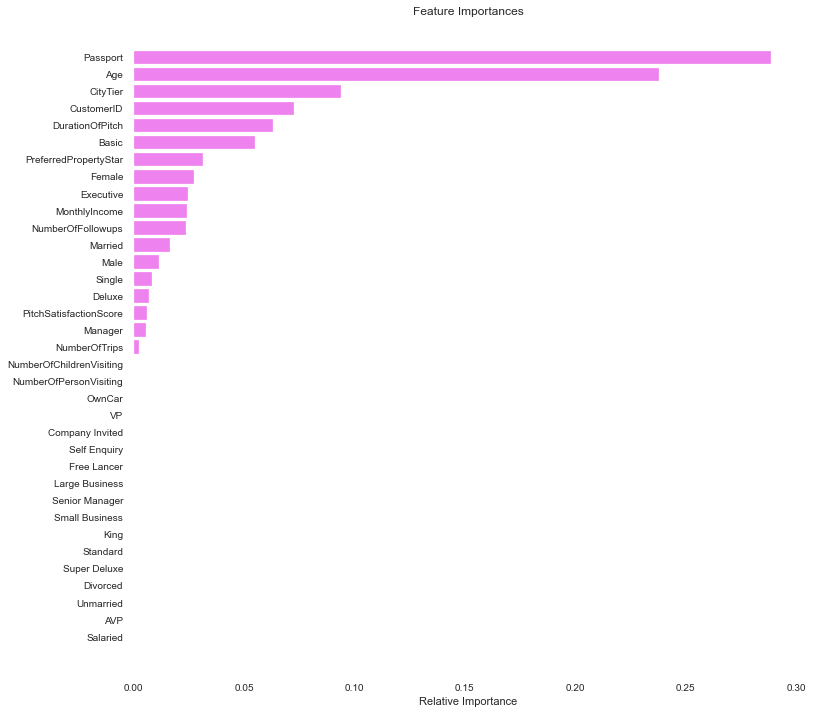

In [111]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

    observation :-
    Passport,Age ,Citytier ,customer ID duration of pitch,Property star,Desgnation,seems to be significant feature,Marital status,Product package all seems to be significant feature.

## GB Classifier

In [112]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [113]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8901292596944771
Accuracy on test set :  0.886223440712817
Recall on training set :  0.4766355140186916
Recall on test set :  0.46545454545454545
Precision on training set :  0.8895348837209303
Precision on test set :  0.8707482993197279


observation :- GB Classifier doesnt seem to have a better recall-46% than the ADA boosting-60%

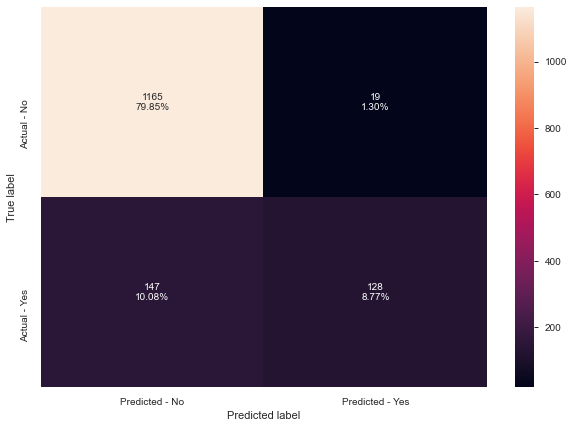

In [125]:
make_confusion_matrix(gbc_init,y_test)

## AUC score

In [122]:
from sklearn.metrics import roc_auc_score
y_pred=gbc_init.predict(X_test)
roc_auc_score(y_test,y_pred)

0.724703624078624

observation :- AUC score-72%  is lil less than the ADA boosting-74%

## GBC Tuned

In [127]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [50,100,150,200],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=0.9)

In [128]:
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9215628672150411
Accuracy on test set :  0.888279643591501
Recall on training set :  0.6199376947040498
Recall on test set :  0.52
Precision on training set :  0.9453681710213777
Precision on test set :  0.8218390804597702


observation :- Recall in GB tuned is slightly better -52% than the GB classifer which is 47%

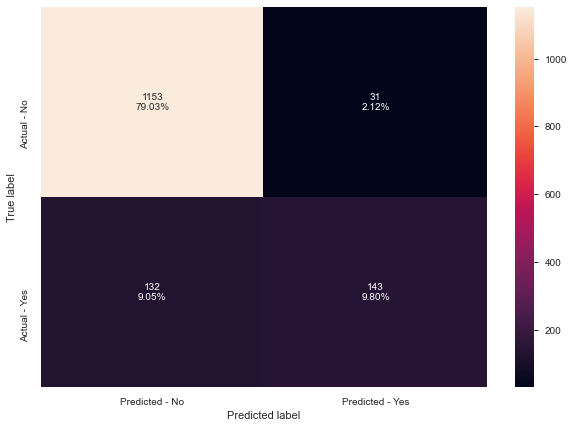

In [129]:
make_confusion_matrix(gbc_tuned,y_test)

## AUC score 

In [137]:
from sklearn.metrics import roc_auc_score
y_pred=gbc_tuned.predict(X_test)
roc_auc_score(y_test,y_pred)

0.7469087837837838

observation :- AUC score-74%  is same the ADA tuned boosting-74% and more than GBC-72%

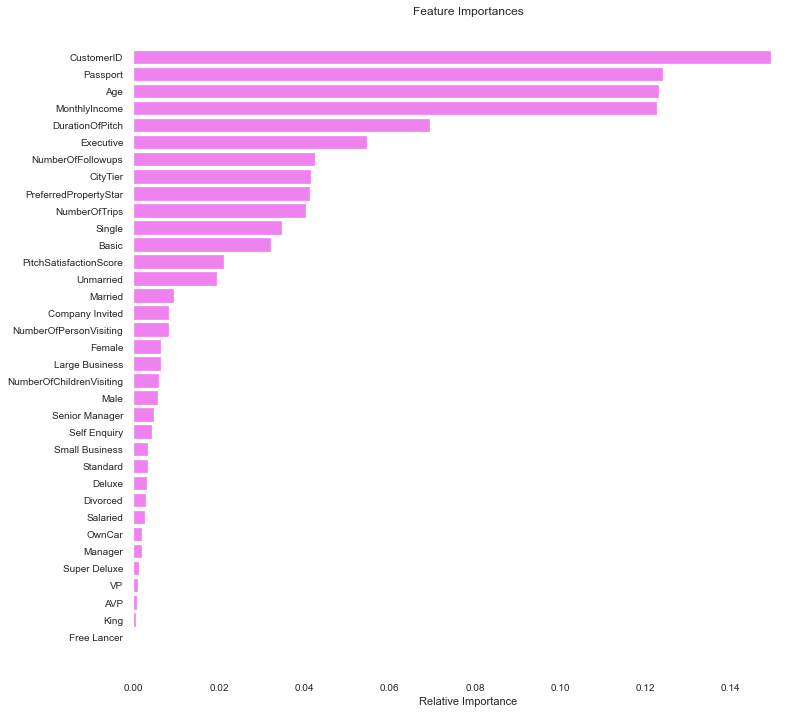

In [130]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

XGBoost has many hyper parameters which can be tuned to increase the model performance. You can read about them in the xgboost documentation here. Some of the important parameters are:

scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to  ∞ .
subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
colsample_bytree: Corresponds to the fraction of features (the columns) to use.
colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [133]:
!pip install xgboost

## XGB tuned

In [136]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='mlogloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1],
    }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='mlogloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [138]:
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9253819036427732
Accuracy on test set :  0.866346812885538
Recall on training set :  0.9548286604361371
Recall on test set :  0.8472727272727273
Precision on training set :  0.7315035799522673
Precision on test set :  0.6036269430051814


observation :- Recall value seems to be better than any previous model -84%

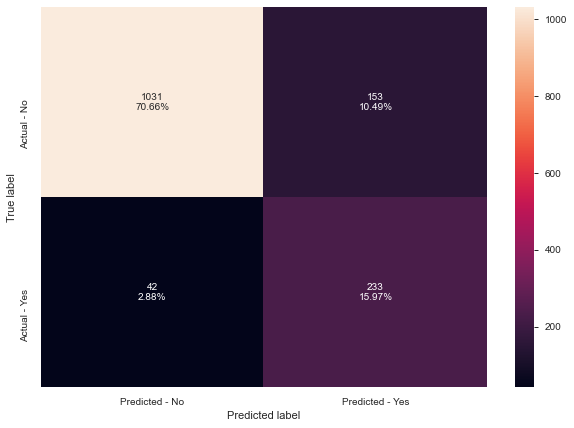

In [139]:
make_confusion_matrix(xgb_tuned,y_test)

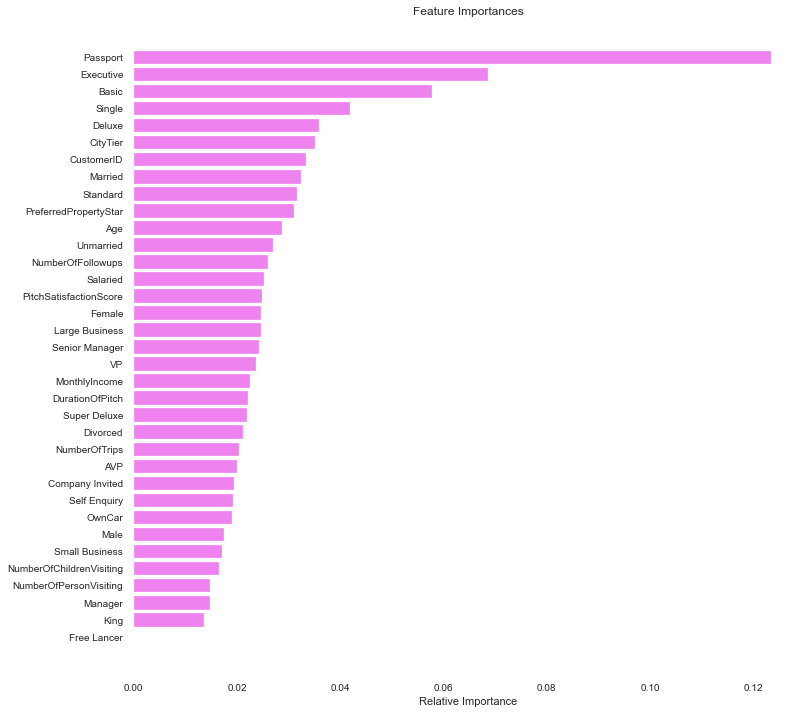

In [140]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## AUC score 

In [141]:
from sklearn.metrics import roc_auc_score
y_pred=xgb_tuned.predict(X_test)
roc_auc_score(y_test,y_pred)

0.8590248771498771

observation :-AUC score is far better than any previous model which is 85%

In [144]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

# Comparing all models

In [145]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0            AdaBoost with default paramters            0.87           0.88   
1                             AdaBoost Tuned            0.84           0.83   
2  Gradient Boosting with default parameters            0.89           0.88   
3       Gradient Boosting with init=AdaBoost            0.89           0.89   
4                    Gradient Boosting Tuned            0.92           0.89   
5            XGBoost with default parameters            1.00           0.93   
6                              XGBoost Tuned            0.93           0.87   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0          0.39         0.47             0.79            0.81  
1          0.59         0.61             0.58            0.55  
2          0.47         0.43             0.88            0.84  
3          0.48         0.47             0.89            0.87  
4          0.62         0.52             0.95            0.82  
5          1.00         0.72             1.00            0.91  
6          0.95         0.85             0.73            0.60

<b>Observation :- </b>
<li>The <b>XGB tuned seems to the best comparatively with higher recall value</b>.However if precision will be taken into consideration the Ada boost with default parameters seems to better.</li>
<li>But considering the <b>ROC score</b> the <b>XGBoost tuned seems to be doing better(84%) </b>than the ADA boost with default parameters(74%)</li>

# Conclusion and Recommendation:

<li>Looking at the results companies focus on the should be on the people who has a passport</li>
<li>It can promote more on the basic product </li>
<li>Poeple who are single seems to have more importance then comes the married and other categories</li>
<li>City tier has some importance ,so company to see if the products could be promoted to them</li>
<li>Salaried has a better feature importance value comapred to others so have some priorities for salaried people than the rest</li>
<li>Company invited seem to have a better importance than the self enquired they can consider invite more people to promote the products </li>
<li>Company should invite or plan to do that to make them get interested with the travel package</li>
<li>XG boost model seem to perform better with better Recallthan any other model so we can focus on this to get them implemented in production than any other model</li>
